# Gráficas

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# df = pd.read_csv('https://data-unix.s3-us-west-1.amazonaws.com/IGC.annotation.tsv.gz', sep='\t')

In [3]:
df = pd.read_csv('data/IGC.annotation.tsv.gz', sep='\t')

In [4]:
df.shape

(500000, 14)

In [5]:
df.head()

,Gene ID,Gene Name,Gene Length,Gene Completeness,Cohort Origin,Taxonomic Annotation(Phylum Level),Taxonomic Annotation(Genus Level),KEGG Annotation,eggNOG Annotation,Sample Occurence Frequency,Individual Occurence Frequency,KEGG Functional Categories,eggNOG Functional Categories,Cohort Assembled
0,5209933,MH0396_GL0114156,549,Lack both ends,EUR,unknown,unknown,unknown,COG4932,0.008682,0.009346,unknown,Cell wall/membrane/envelope biogenesis,EUR
1,6811315,MH0012_GL0174453,372,Complete,EUR,unknown,unknown,K00335,COG3411,0.187056,0.195327,Energy Metabolism,Energy production and conversion,EUR;CHN;USA
2,7221353,MH0389_GL0170585,330,Lack 5'-end,EUR,unknown,unknown,unknown,unknown,0.015785,0.018692,unknown,unknown,EUR
3,8950791,DOM015_GL0050638,177,Lack 5'-end,CHN,unknown,unknown,unknown,NOG125034,0.008682,0.008411,unknown,Function unknown,CHN
4,2441669,469596.HMPREF9488_01493,984,Complete,SP,Firmicutes,Coprobacillus,unknown,unknown,0.112865,0.113084,unknown,unknown,EUR;CHN;USA


In [6]:
df.columns = df.columns.str.replace(' ', '_').str.lower() \
                       .str.replace('(', '_', regex=True) \
                       .str.replace(')', '', regex=True)

In [7]:
df.columns

Index(['gene_id', 'gene_name', 'gene_length', 'gene_completeness',
       'cohort_origin', 'taxonomic_annotation_phylum_level',
       'taxonomic_annotation_genus_level', 'kegg_annotation',
       'eggnog_annotation', 'sample_occurence_frequency',
       'individual_occurence_frequency', 'kegg_functional_categories',
       'eggnog_functional_categories', 'cohort_assembled'],
      dtype='object')

In [8]:
df = df[df['gene_completeness'] == 'Complete']
df = df[df['kegg_annotation'] != 'unknown']
df = df[df['eggnog_annotation'] != 'unknown']
df = df[df['taxonomic_annotation_phylum_level'] != 'unknown']
df = df[df['taxonomic_annotation_genus_level'] != 'unknown']
df.drop(['gene_id', 'cohort_assembled'], axis=1, inplace=True)
df.dropna()
df.drop('gene_completeness', axis=1, inplace=True)

In [9]:
# df = df[(df['gene_completeness'] == 'Complete') & \ 
#         (df['kegg_annotation'] != 'unknown') & \
#         (df['eggnog_annotation'] != 'unknown') & \
#         (df['taxonomic_annotation_phylum_level'] != 'unknown') & \
#         (df['taxonomic_annotation_genus_level'] != 'unknown')]

In [10]:
df.shape

(28385, 11)

In [11]:
df.columns

Index(['gene_name', 'gene_length', 'cohort_origin',
       'taxonomic_annotation_phylum_level', 'taxonomic_annotation_genus_level',
       'kegg_annotation', 'eggnog_annotation', 'sample_occurence_frequency',
       'individual_occurence_frequency', 'kegg_functional_categories',
       'eggnog_functional_categories'],
      dtype='object')

In [12]:
df.columns = df.columns.str.replace('occurence_frequency', 'freq')\
                       .str.replace('taxonomic_annotation_', '', regex=True) \
                       .str.replace('functional_categories', 'cat', regex=True) \
                       .str.replace('_annotation', '', regex=True)

In [13]:
df.columns

Index(['gene_name', 'gene_length', 'cohort_origin', 'phylum_level',
       'genus_level', 'kegg', 'eggnog', 'sample_freq', 'individual_freq',
       'kegg_cat', 'eggnog_cat'],
      dtype='object')

In [14]:
df.head()

,gene_name,gene_length,cohort_origin,phylum_level,genus_level,kegg,eggnog,sample_freq,individual_freq,kegg_cat,eggnog_cat
72,O2.UC4-2_GL0020677,1518,EUR,Firmicutes,Ruminococcus,K00140,COG1012,0.524862,0.505607,Carbohydrate Metabolism,Energy production and conversion
107,O2.UC2-0_GL0040460,393,EUR,Firmicutes,Eubacterium,K01005,COG2148,0.043410,0.036449,Metabolism,Cell wall/membrane/envelope biogenesis
124,521000.PROVRETT_07996,723,SP,Proteobacteria,Providencia,K03981,COG1651,0.000789,0.000000,"Folding, Sorting and Degradation","Posttranslational modification, protein turnov..."
128,N046A_GL0067287,1179,CHN,Synergistetes,Aminomonas,K01154,COG0732,0.006314,0.007477,Genetic Information Processing,Defense mechanisms
140,DLF004_GL0022338,1245,CHN,Bacteroidetes,Bacteroides,K03544,COG1219,0.047356,0.050467,"Folding, Sorting and Degradation","Posttranslational modification, protein turnov..."


In [15]:
df.reset_index(drop=True, inplace=True)

In [16]:
df.head()

,gene_name,gene_length,cohort_origin,phylum_level,genus_level,kegg,eggnog,sample_freq,individual_freq,kegg_cat,eggnog_cat
0,O2.UC4-2_GL0020677,1518,EUR,Firmicutes,Ruminococcus,K00140,COG1012,0.524862,0.505607,Carbohydrate Metabolism,Energy production and conversion
1,O2.UC2-0_GL0040460,393,EUR,Firmicutes,Eubacterium,K01005,COG2148,0.043410,0.036449,Metabolism,Cell wall/membrane/envelope biogenesis
2,521000.PROVRETT_07996,723,SP,Proteobacteria,Providencia,K03981,COG1651,0.000789,0.000000,"Folding, Sorting and Degradation","Posttranslational modification, protein turnov..."
3,N046A_GL0067287,1179,CHN,Synergistetes,Aminomonas,K01154,COG0732,0.006314,0.007477,Genetic Information Processing,Defense mechanisms
4,DLF004_GL0022338,1245,CHN,Bacteroidetes,Bacteroides,K03544,COG1219,0.047356,0.050467,"Folding, Sorting and Degradation","Posttranslational modification, protein turnov..."


In [17]:
import numpy as np
df['normal_freq'] = np.random.normal(df['sample_freq'] + 100)
df['normal_freq_2'] = np.random.normal(df['sample_freq'] + 50)

In [18]:
df.head()

,gene_name,gene_length,cohort_origin,phylum_level,genus_level,kegg,eggnog,sample_freq,individual_freq,kegg_cat,eggnog_cat,normal_freq,normal_freq_2
0,O2.UC4-2_GL0020677,1518,EUR,Firmicutes,Ruminococcus,K00140,COG1012,0.524862,0.505607,Carbohydrate Metabolism,Energy production and conversion,100.992864,50.025234
1,O2.UC2-0_GL0040460,393,EUR,Firmicutes,Eubacterium,K01005,COG2148,0.043410,0.036449,Metabolism,Cell wall/membrane/envelope biogenesis,101.049704,48.704215
2,521000.PROVRETT_07996,723,SP,Proteobacteria,Providencia,K03981,COG1651,0.000789,0.000000,"Folding, Sorting and Degradation","Posttranslational modification, protein turnov...",99.980882,48.911444
3,N046A_GL0067287,1179,CHN,Synergistetes,Aminomonas,K01154,COG0732,0.006314,0.007477,Genetic Information Processing,Defense mechanisms,100.610081,51.341411
4,DLF004_GL0022338,1245,CHN,Bacteroidetes,Bacteroides,K03544,COG1219,0.047356,0.050467,"Folding, Sorting and Degradation","Posttranslational modification, protein turnov...",100.623146,48.732530


<center><img src="imgs/01.png" width=800 height=800/></center>

<center><img src="imgs/02.png" width=800 height=800/></center>

<center><img src="imgs/03.png" width=800 height=800/></center>

<center><img src="imgs/04.png" width=800 height=800/></center>

<center><img src="imgs/05.png" width=800 height=800/></center>

<center><img src="imgs/06.png" width=800 height=800/></center>

<center><img src="imgs/07.png" width=800 height=800/></center>

## Gráficas de distribución

<center><img src="imgs/01.png" width=800 height=800/></center>

In [19]:
df.dtypes

gene_name           object
gene_length          int64
cohort_origin       object
phylum_level        object
genus_level         object
kegg                object
eggnog              object
sample_freq        float64
individual_freq    float64
kegg_cat            object
eggnog_cat          object
normal_freq        float64
normal_freq_2      float64
dtype: object

<center><img src="imgs/01.png" width=800 height=800/></center>

## Violin

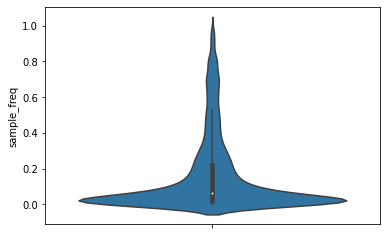

In [20]:
sns.violinplot(y=df['sample_freq']);

In [21]:
# https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set(rc={'figure.figsize':(10,8)})             # Tamaño de la imagen
sns.set_style("white")  # whitegrid

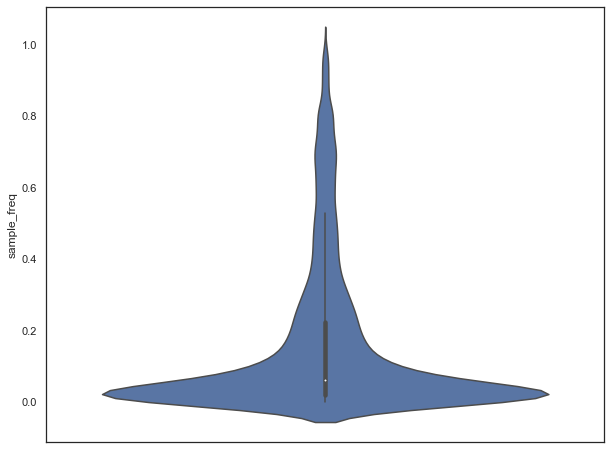

In [22]:
sns.violinplot(y=df['sample_freq']);

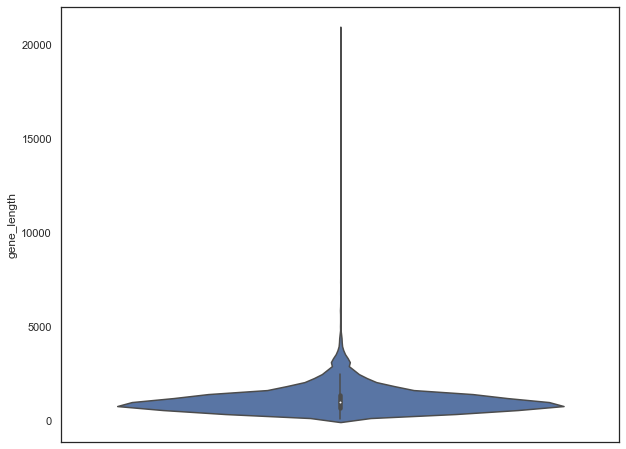

In [23]:
sns.violinplot( y=df['gene_length']);

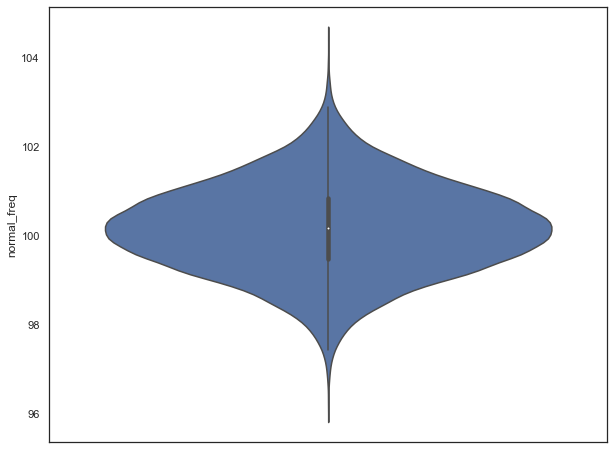

In [24]:
sns.violinplot( y=df['normal_freq']);

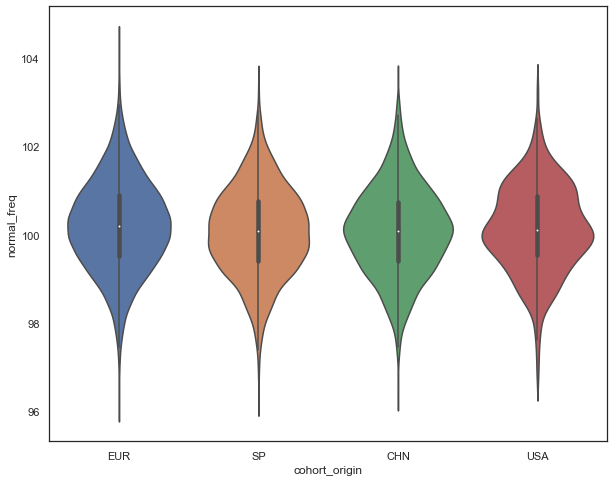

In [25]:
sns.violinplot(x=df['cohort_origin'], y=df['normal_freq']);

## Density

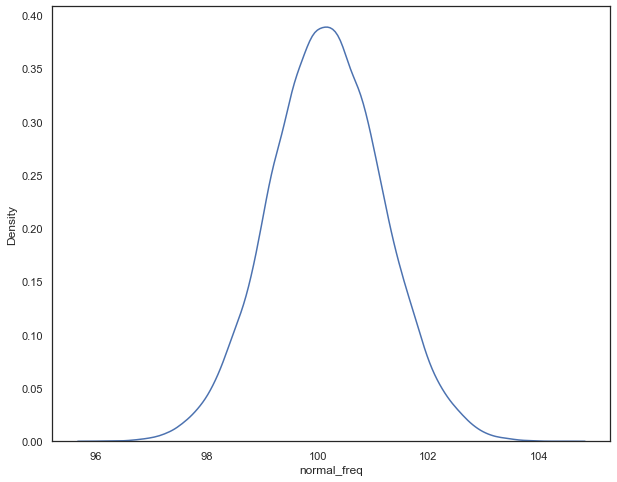

In [26]:
sns.kdeplot(df['normal_freq']);

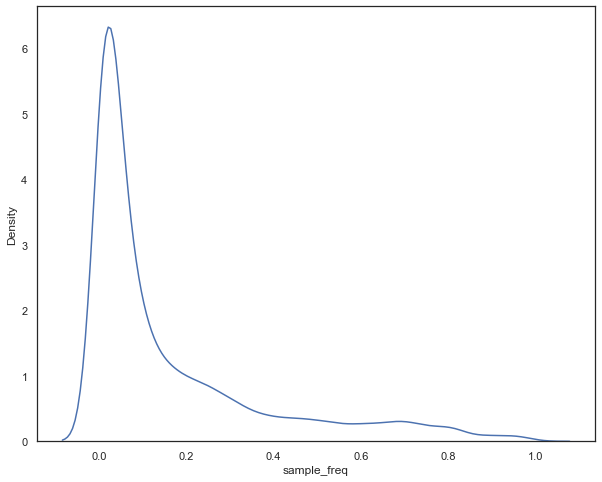

In [27]:
sns.kdeplot(df['sample_freq']);

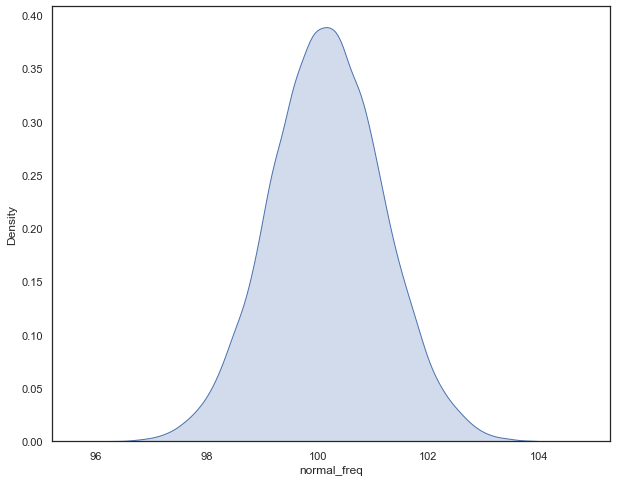

In [28]:
sns.kdeplot(df['normal_freq'], shade=True);

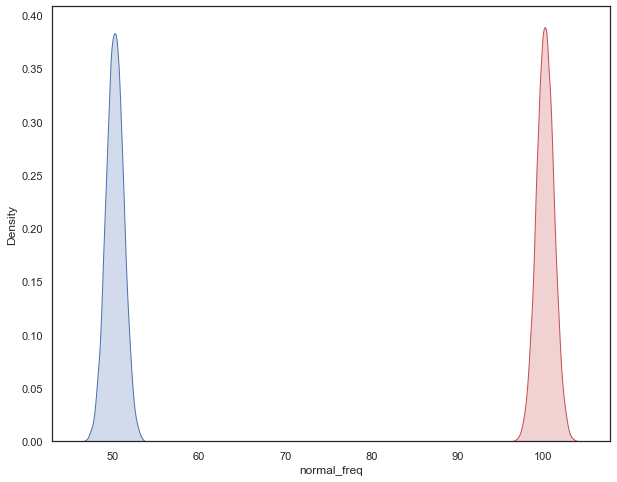

In [29]:
g = sns.kdeplot(df['normal_freq'], shade=True, color="r")
g = sns.kdeplot(df['normal_freq_2'], shade=True, color="b")

## Boxplot

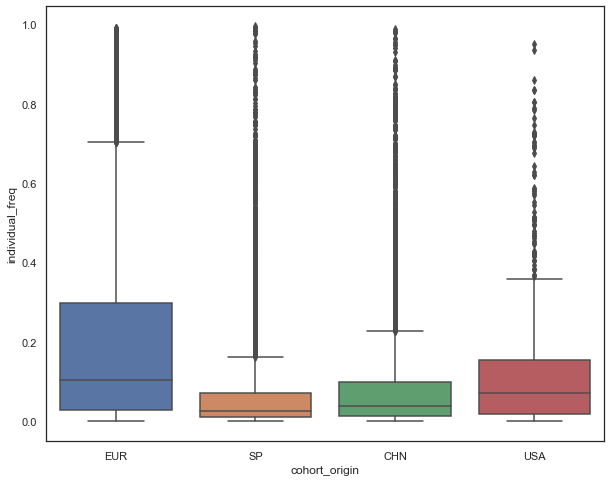

In [30]:
sns.boxplot(x='cohort_origin', y='individual_freq', data=df);

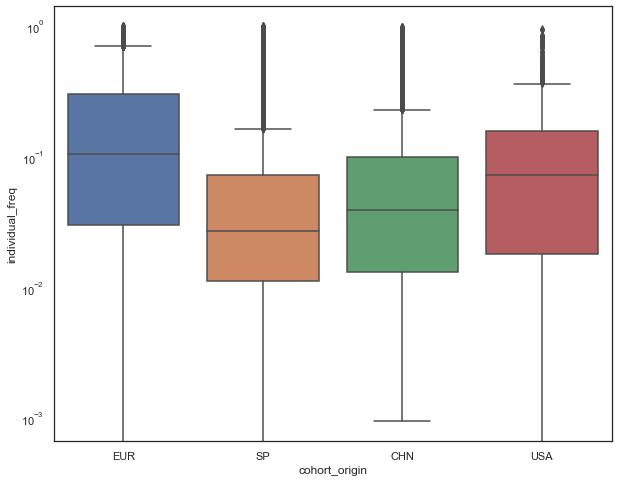

In [31]:
g = sns.boxplot(x='cohort_origin', y='individual_freq', data=df);
g.set_yscale("log")

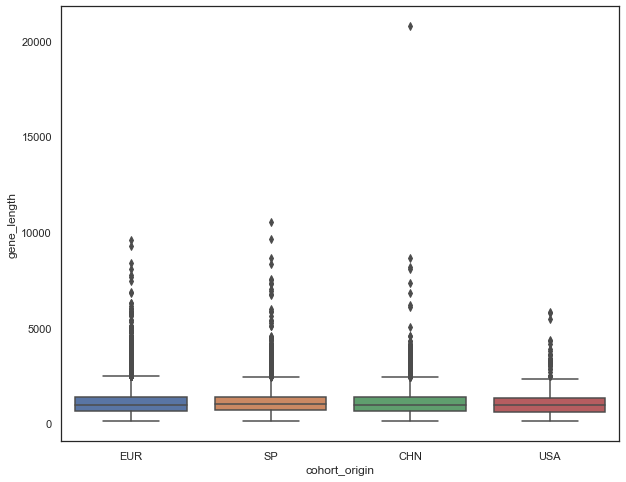

In [32]:
sns.boxplot(x='cohort_origin', y='gene_length', data=df);

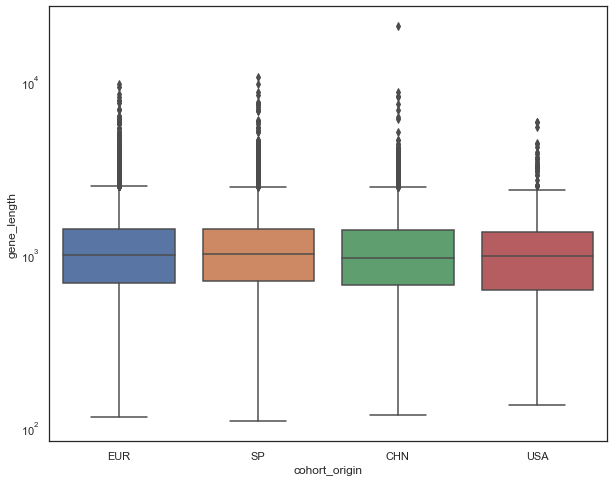

In [33]:
g = sns.boxplot(x='cohort_origin', y='gene_length', data=df);
g.set_yscale("log")

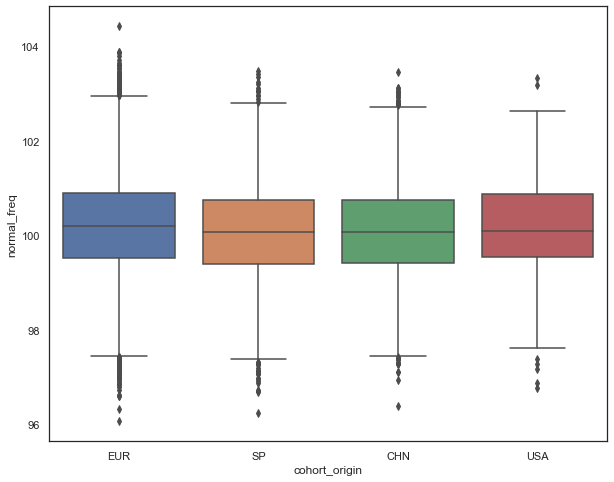

In [34]:
sns.boxplot(x='cohort_origin', y='normal_freq', data=df);

## Histrograms

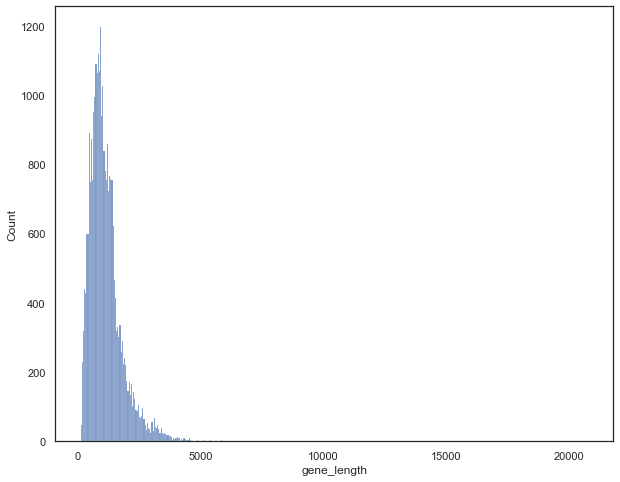

In [35]:
sns.histplot(df["gene_length"]);

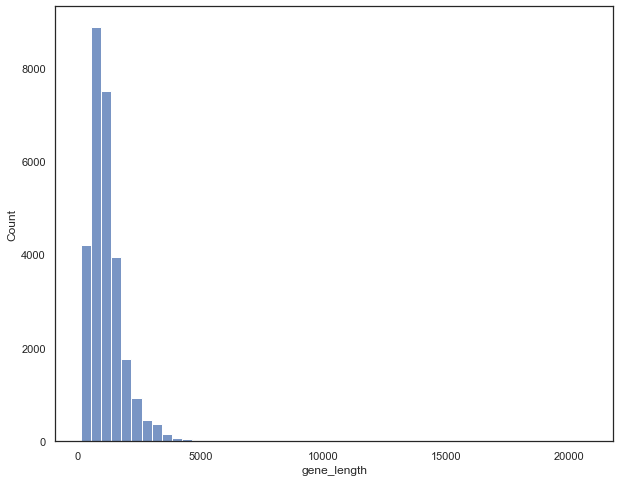

In [36]:
sns.histplot(df["gene_length"], bins=50);

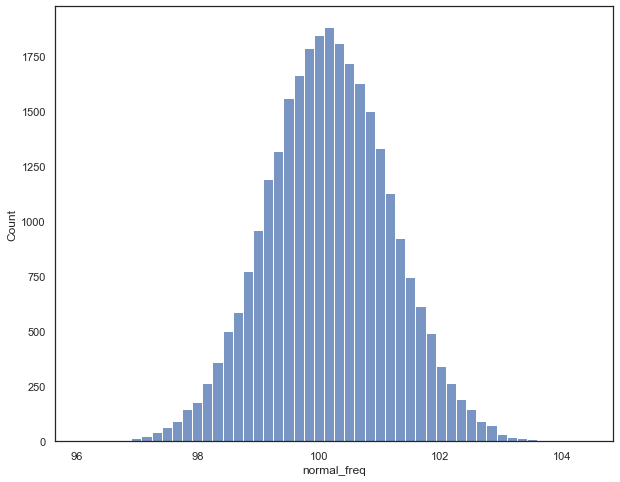

In [37]:
sns.histplot(df["normal_freq"], bins=50);

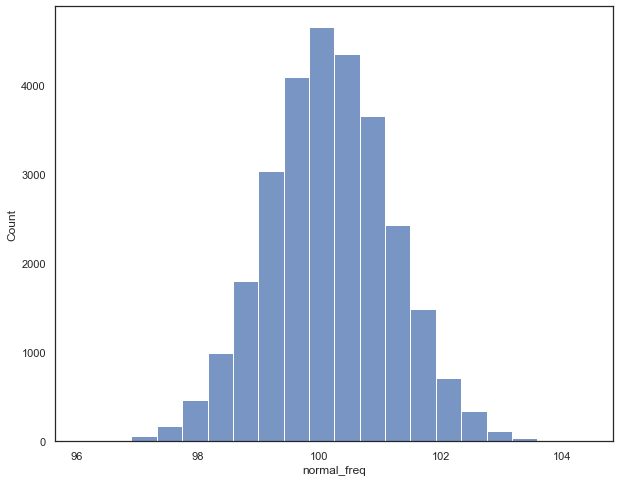

In [38]:
sns.histplot(df["normal_freq"], bins=20);

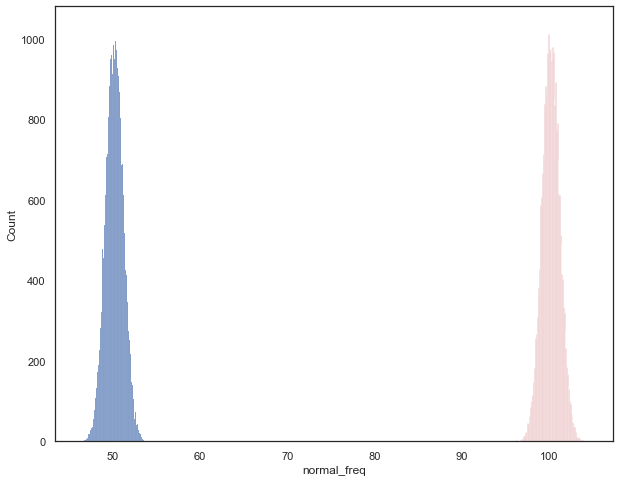

In [39]:
g = sns.histplot(df["normal_freq"] , color="r")
g = sns.histplot(df["normal_freq_2"] , color="b")

## Line

In [40]:
df._get_numeric_data()

,gene_length,sample_freq,individual_freq,normal_freq,normal_freq_2
0,1518,0.524862,0.505607,100.992864,50.025234
1,393,0.043410,0.036449,101.049704,48.704215
2,723,0.000789,0.000000,99.980882,48.911444
3,1179,0.006314,0.007477,100.610081,51.341411
4,1245,0.047356,0.050467,100.623146,48.732530
...,...,...,...,...,...
28380,813,0.022099,0.024299,99.987181,49.173252
28381,891,0.125493,0.132710,101.131277,48.510119
28382,579,0.004736,0.005607,100.908683,51.689971
28383,822,0.390687,0.387850,100.853893,51.230835


In [41]:
import matplotlib.pyplot as plt

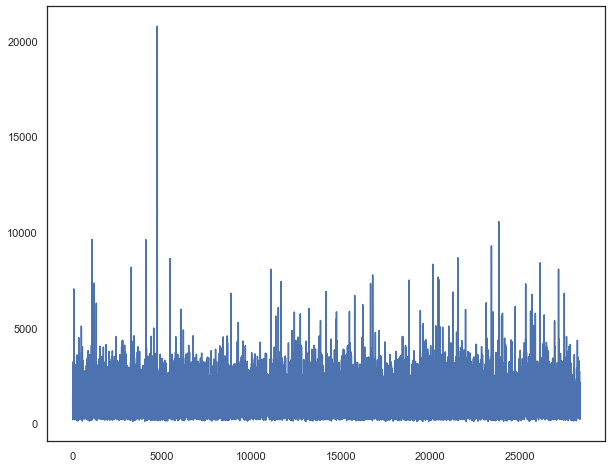

In [42]:
plt.plot(df['gene_length']);

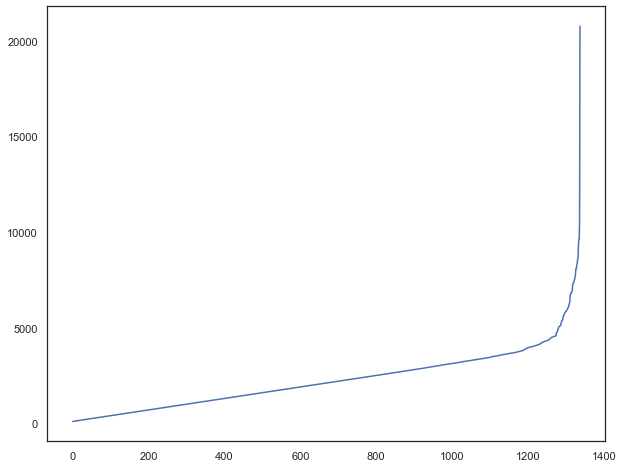

In [43]:
plt.plot(sorted(df['gene_length'].unique()));

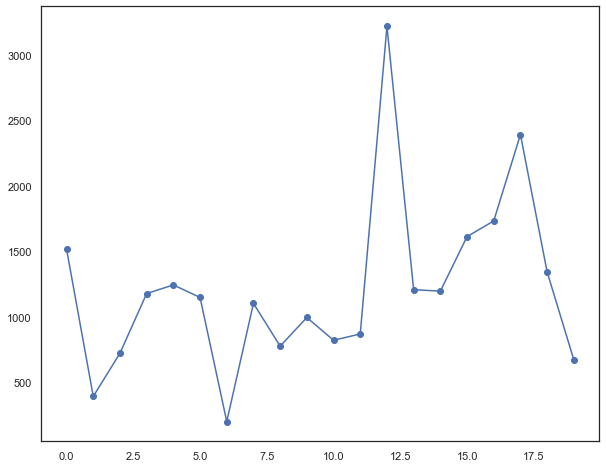

In [44]:
plt.plot(df['gene_length'].head(20), marker='o');

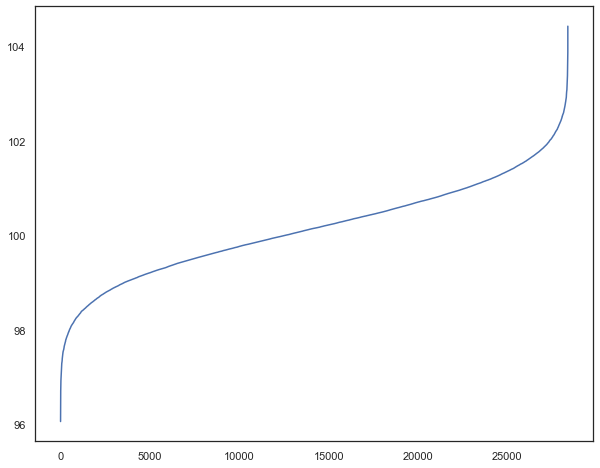

In [45]:
plt.plot(sorted(df['normal_freq'].unique()));

## Scatterplot

In [46]:
df.head()

,gene_name,gene_length,cohort_origin,phylum_level,genus_level,kegg,eggnog,sample_freq,individual_freq,kegg_cat,eggnog_cat,normal_freq,normal_freq_2
0,O2.UC4-2_GL0020677,1518,EUR,Firmicutes,Ruminococcus,K00140,COG1012,0.524862,0.505607,Carbohydrate Metabolism,Energy production and conversion,100.992864,50.025234
1,O2.UC2-0_GL0040460,393,EUR,Firmicutes,Eubacterium,K01005,COG2148,0.043410,0.036449,Metabolism,Cell wall/membrane/envelope biogenesis,101.049704,48.704215
2,521000.PROVRETT_07996,723,SP,Proteobacteria,Providencia,K03981,COG1651,0.000789,0.000000,"Folding, Sorting and Degradation","Posttranslational modification, protein turnov...",99.980882,48.911444
3,N046A_GL0067287,1179,CHN,Synergistetes,Aminomonas,K01154,COG0732,0.006314,0.007477,Genetic Information Processing,Defense mechanisms,100.610081,51.341411
4,DLF004_GL0022338,1245,CHN,Bacteroidetes,Bacteroides,K03544,COG1219,0.047356,0.050467,"Folding, Sorting and Degradation","Posttranslational modification, protein turnov...",100.623146,48.732530


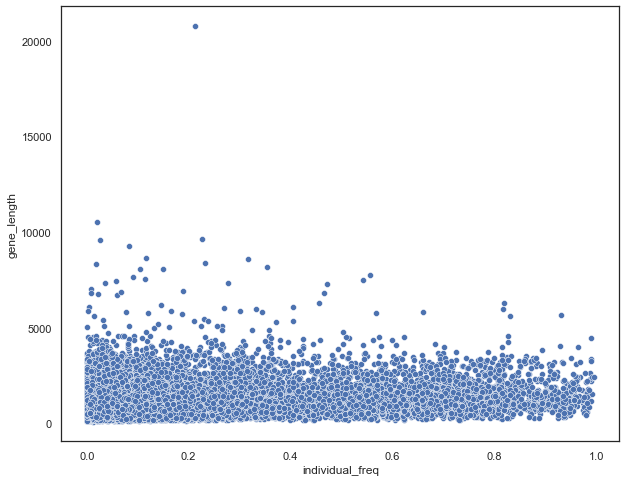

In [47]:
sns.scatterplot(x=df["individual_freq"], y=df["gene_length"]);

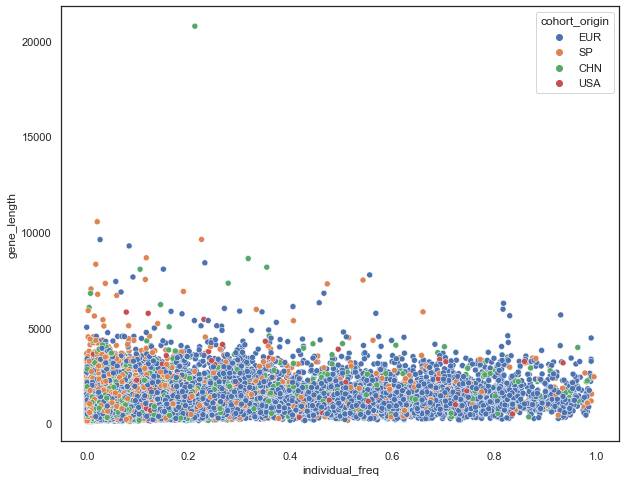

In [48]:
sns.scatterplot(x=df["individual_freq"], y=df["gene_length"], hue=df['cohort_origin']);

In [49]:
df.columns

Index(['gene_name', 'gene_length', 'cohort_origin', 'phylum_level',
       'genus_level', 'kegg', 'eggnog', 'sample_freq', 'individual_freq',
       'kegg_cat', 'eggnog_cat', 'normal_freq', 'normal_freq_2'],
      dtype='object')

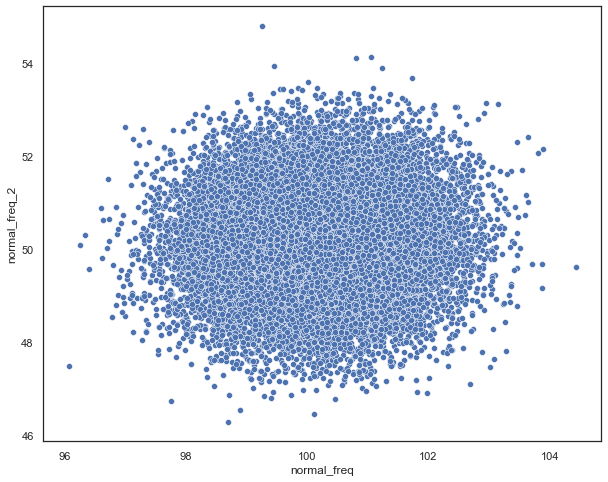

In [50]:
g = sns.scatterplot(x="normal_freq", y="normal_freq_2", data=df)

In [51]:
plt.savefig("imgs/scatter.png")

<Figure size 720x576 with 0 Axes>

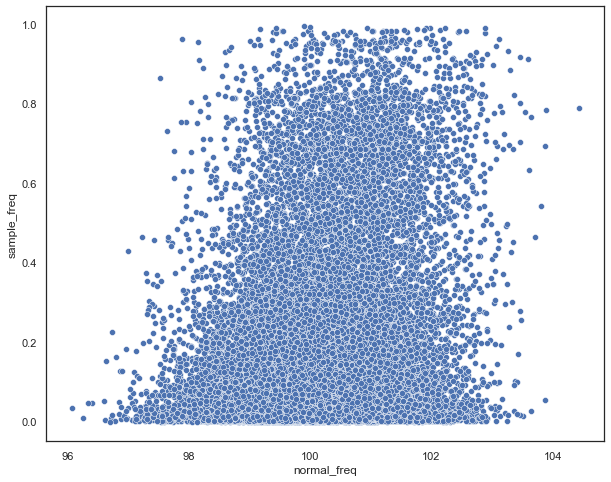

In [52]:
sns.scatterplot(x=df["normal_freq"], y=df["sample_freq"]);

## Heatmap

In [53]:
df.head()

,gene_name,gene_length,cohort_origin,phylum_level,genus_level,kegg,eggnog,sample_freq,individual_freq,kegg_cat,eggnog_cat,normal_freq,normal_freq_2
0,O2.UC4-2_GL0020677,1518,EUR,Firmicutes,Ruminococcus,K00140,COG1012,0.524862,0.505607,Carbohydrate Metabolism,Energy production and conversion,100.992864,50.025234
1,O2.UC2-0_GL0040460,393,EUR,Firmicutes,Eubacterium,K01005,COG2148,0.043410,0.036449,Metabolism,Cell wall/membrane/envelope biogenesis,101.049704,48.704215
2,521000.PROVRETT_07996,723,SP,Proteobacteria,Providencia,K03981,COG1651,0.000789,0.000000,"Folding, Sorting and Degradation","Posttranslational modification, protein turnov...",99.980882,48.911444
3,N046A_GL0067287,1179,CHN,Synergistetes,Aminomonas,K01154,COG0732,0.006314,0.007477,Genetic Information Processing,Defense mechanisms,100.610081,51.341411
4,DLF004_GL0022338,1245,CHN,Bacteroidetes,Bacteroides,K03544,COG1219,0.047356,0.050467,"Folding, Sorting and Degradation","Posttranslational modification, protein turnov...",100.623146,48.732530


In [54]:
df[["phylum_level", "gene_name", "sample_freq"]].head()

,phylum_level,gene_name,sample_freq
0,Firmicutes,O2.UC4-2_GL0020677,0.524862
1,Firmicutes,O2.UC2-0_GL0040460,0.043410
2,Proteobacteria,521000.PROVRETT_07996,0.000789
3,Synergistetes,N046A_GL0067287,0.006314
4,Bacteroidetes,DLF004_GL0022338,0.047356


In [55]:
df.head(100).pivot_table(index="phylum_level",
                                columns="gene_name",
                                values="sample_freq",
                                fill_value=0)

gene_name,159713063-stool1_revised_scaffold2575_2_gene39776,160765029-stool1_revised_scaffold21321_1_gene44384,290338.CKO_01343,290338.CKO_02239,290338.CKO_02664,339860.Msp_1507,360104.CCC13826_1020,435842.HMPREF0848_00020,445972.ANACOL_03441,469595.CSAG_00324,...,V1.FI17_GL0061767,V1.FI18_GL0151602,V1.FI20_GL0009956,V1.FI24_GL0188383,V1.FI29_GL0071720,V1.UC11-0_GL0062017,V1.UC11-5_GL0062007,V1.UC21-4_GL0131271,V1.UC3-0_GL0047454,V1.UC38-0_GL0121458
phylum_level,,,,,,,,,,,,,,,,,,,,,
Actinobacteria,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.029203,0.000000,0.270718,0.000000,0.000000,0.000000,0.000000,0.000000
Bacteroidetes,0.012628,0.123125,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Euryarchaeota,0.000000,0.000000,0.00000,0.000000,0.000000,0.044199,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Firmicutes,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.01105,0.313339,0.000000,...,0.000000,0.004736,0.000000,0.002368,0.000000,0.003946,0.144436,0.403315,0.037885,0.014207
Fusobacteria,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.015785,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Proteobacteria,0.000000,0.000000,0.01105,0.011839,0.007893,0.000000,0.013418,0.00000,0.000000,0.037885,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Synergistetes,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Verrucomicrobia,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [56]:
data = df.head(100).pivot_table(index="phylum_level",
                                columns="gene_name",
                                values="sample_freq",
                                fill_value=0)

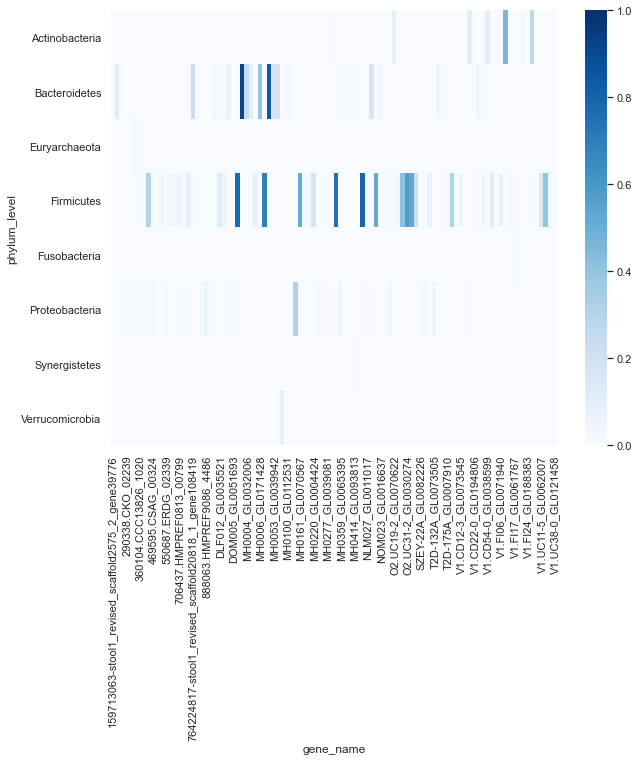

In [57]:
sns.heatmap(data, vmin=0, vmax=1, cmap='Blues');

In [58]:
data = df.head(100).pivot_table(index="gene_name",
                                columns="phylum_level",
                                values="sample_freq",
                                fill_value=0)

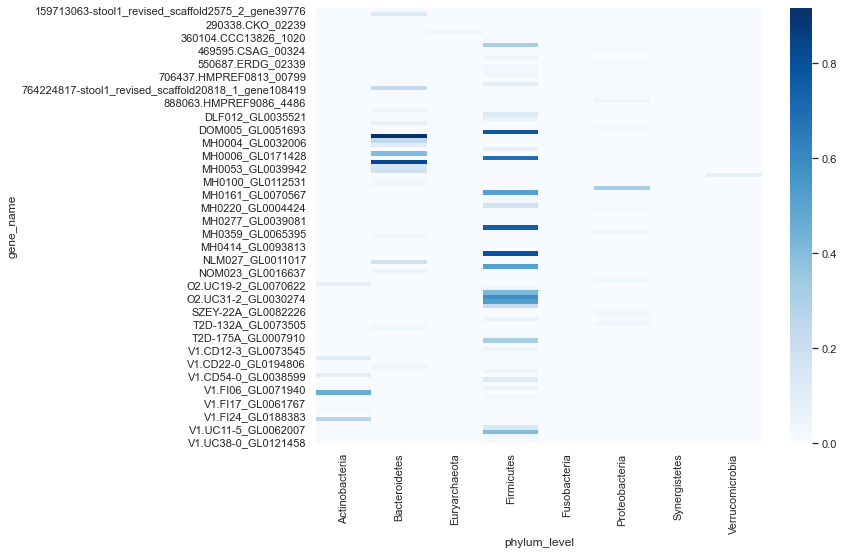

In [59]:
sns.heatmap(data, cmap='Blues');

## Swarmplot

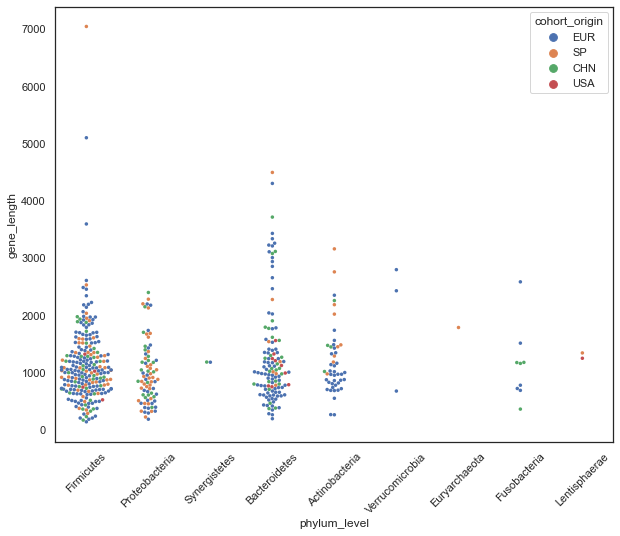

In [60]:
g = sns.swarmplot(x=df["phylum_level"].head(500),
              y=df["gene_length"].head(500), 
              hue=df['cohort_origin'].head(500), size=3.5);
g.set_xticklabels(g.get_xticklabels(), rotation=45);

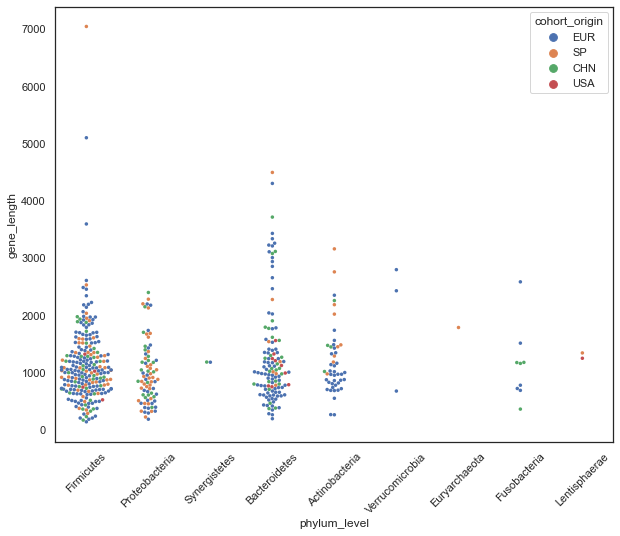

In [61]:
g = sns.swarmplot(x=df["phylum_level"].head(500), 
              y=df["gene_length"].head(500), 
              hue=df['cohort_origin'].head(500), size=3.5);
g.set_xticklabels(g.get_xticklabels(), rotation=45);

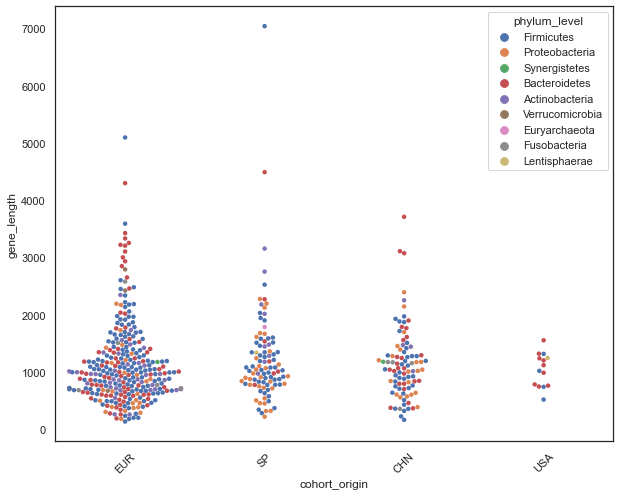

In [62]:
g = sns.swarmplot(x=df["cohort_origin"].head(500), 
              y=df["gene_length"].head(500), 
              hue=df['phylum_level'].head(500), size=4.5);
g.set_xticklabels(g.get_xticklabels(), rotation=45);

In [63]:
# Más ejemplos en: https://seaborn.pydata.org/examples/index.html